In [1]:
pip install mediapipe


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [2]:
pip install opencv-python

Teeth area coordinates: Top-left (x, y): (97, 127), Width: 57, Height: 35


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


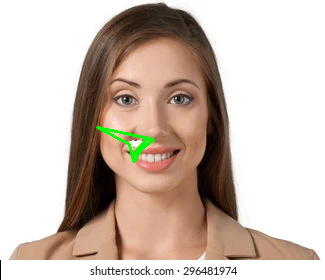

In [3]:
import cv2
import numpy as np
import mediapipe as mp
from google.colab.patches import cv2_imshow

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5)

# Load the input image
img = cv2.imread("/content/human-face-women-portrait-260nw-296481974.jpg")
height, width, _ = img.shape

# Convert the image to RGB
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform facial landmarks detection
results = face_mesh.process(rgb_img)

if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        # Extract the coordinates for the teeth area (upper and lower inner lips)
        upper_teeth_landmarks = []
        lower_teeth_landmarks = []
        for idx in range(97,54):  # Indices for upper teeth
            x = int(face_landmarks.landmark[idx].x * width)
            y = int(face_landmarks.landmark[idx].y * height)
            upper_teeth_landmarks.append([x, y])

        for idx in range(88, 98):  # Indices for lower teeth
            x = int(face_landmarks.landmark[idx].x * width)
            y = int(face_landmarks.landmark[idx].y * height)
            lower_teeth_landmarks.append([x, y])

        teeth_landmarks = np.array(upper_teeth_landmarks + lower_teeth_landmarks, dtype=np.int32)

        # Find the bounding box of the teeth area
        (x, y, w, h) = cv2.boundingRect(teeth_landmarks)

        # Load the replacement image (must be resized to fit the teeth area)
        replacement_teeth_img = cv2.imread("/content/mm-removebg-preview.png")
        replacement_teeth_img = cv2.resize(replacement_teeth_img, (w, h))

        # Create a mask for the teeth area
        mask = np.zeros((height, width), dtype=np.uint8)
        cv2.fillPoly(mask, [teeth_landmarks], 255)

        # Extract the region of interest (ROI) for the teeth area
        teeth_area = img[y:y+h, x:x+w]

        # Blend the replacement image with the original teeth area using the mask
        img[y:y+h, x:x+w] = cv2.seamlessClone(replacement_teeth_img, teeth_area, mask[y:y+h, x:x+w], (w//2, h//2), cv2.NORMAL_CLONE)

        # Optional: Draw the teeth area for visualization
        cv2.polylines(img, [teeth_landmarks], isClosed=True, color=(0, 255, 0), thickness=2)

        # Print the coordinates of the teeth area
        print(f"Teeth area coordinates: Top-left (x, y): ({x}, {y}), Width: {w}, Height: {h}")

# Display the output image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


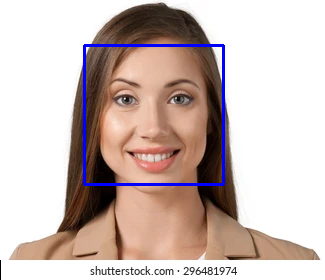

In [4]:
import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the input image
img = cv2.imread('/content/human-face-women-portrait-260nw-296481974.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the result
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Face found at X: 84, Y: 45, Width: 139, Height: 139


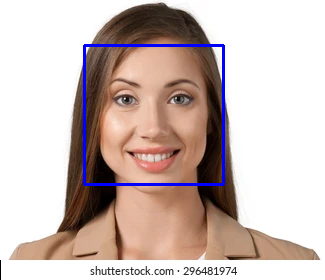

In [5]:
import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the input image
img = cv2.imread('human-face-women-portrait-260nw-296481974.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Loop over each detected face
for (x, y, w, h) in faces:
    # Draw a rectangle around the face (optional)
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Print the coordinates of the face
    print(f"Face found at X: {x}, Y: {y}, Width: {w}, Height: {h}")

# Display the image with the detected face(s)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
pip install dlib


Lip area coordinates: Top-left (x, y): (336, 270), Width: 115, Height: 47


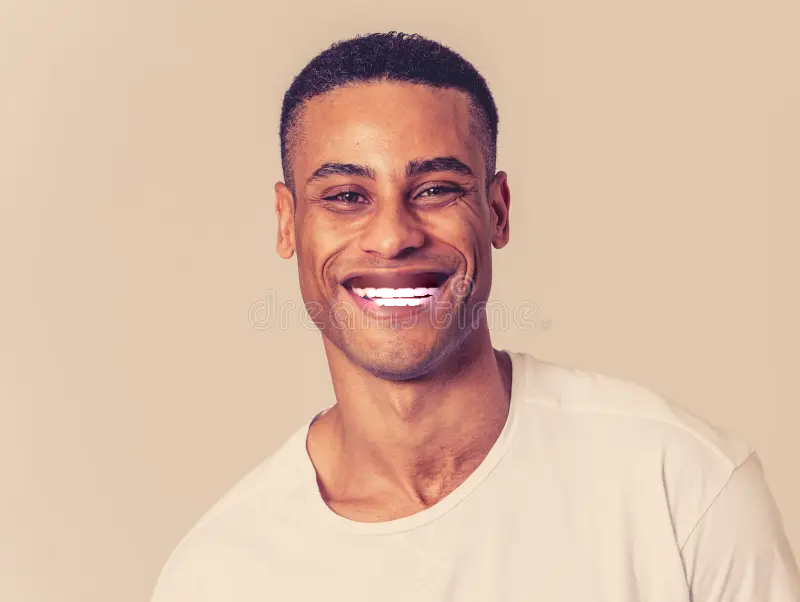

In [7]:
import cv2
import dlib
from google.colab.patches import cv2_imshow
import numpy as np

# Load the pre-trained face detector and facial landmarks predictor from dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # You need to download this file separately

# Load the input image
img = cv2.imread("/content/new im.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = detector(gray)

# Iterate over each detected face
for face in faces:
    # Detect facial landmarks
    landmarks = predictor(gray, face)

    # Extract the coordinates for the lip area (points 48-67 for outer lips)
    lip_points = np.array([[landmarks.part(n).x, landmarks.part(n).y] for n in range(48,68)], dtype=np.int32)

    # Find the bounding box for the lip area
    (x, y, w, h) = cv2.boundingRect(lip_points)

    # Load the replacement image
    replacement_img = cv2.imread("/content/mm-removebg-preview.png")
    if replacement_img is None:
        print("Error: Could not load replacement image.")
        continue

    # Option 1: Direct resizing to the bounding box dimensions
    replacement_img_resized = cv2.resize(replacement_img, (w, h))

    # Option 2: Apply a scaling factor to adjust the size of the replacement image
    scaling_factor = 1.2  # Example scaling factor
    new_width = int(w * scaling_factor)
    new_height = int(h * scaling_factor)
    replacement_img_resized = cv2.resize(replacement_img, (new_width, new_height))

    # Create a mask for the lip area
    mask = np.zeros_like(gray)
    cv2.fillConvexPoly(mask, lip_points, 255)

    # Extract the region of interest (ROI) in the target image
    lip_area = img[y:y+h, x:x+w]

    # Ensure the replacement image fits within the bounds of the ROI
    if replacement_img_resized.shape[0] > lip_area.shape[0] or replacement_img_resized.shape[1] > lip_area.shape[1]:
        replacement_img_resized = cv2.resize(replacement_img_resized, (lip_area.shape[1], lip_area.shape[0]))

    # Seamlessly clone the replacement image onto the lip area
    img[y:y+h, x:x+w] = cv2.seamlessClone(replacement_img_resized, img[y:y+h, x:x+w], mask[y:y+h, x:x+w], (w//2, h//2), cv2.NORMAL_CLONE)

    # Optional: Draw the lip area for visualization
    # cv2.polylines(img, [lip_points], isClosed=True, color=(0, 255, 0), thickness=1)

    # Print the coordinates of the lip area
    print(f"Lip area coordinates: Top-left (x, y): ({x}, {y}), Width: {w}, Height: {h}")

# Display the result
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:
pip install face_alignment

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100%|██████████| 85.7M/85.7M [00:05<00:00, 16.1MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip
100%|██████████| 91.9M/91.9M [00:06<00:00, 15.9MB/s]


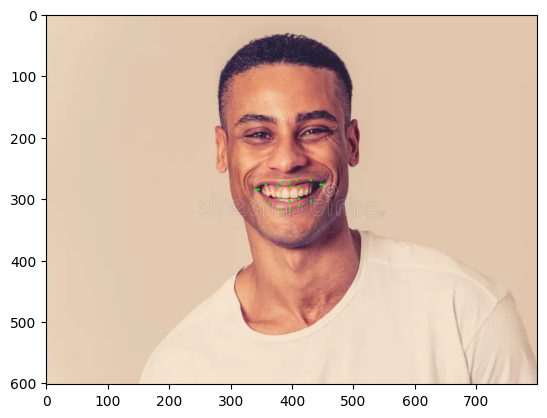

In [9]:
import face_alignment
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# Initialize face alignment model
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, flip_input=False,device='cpu')

# Load image
img = cv2.imread("/content/new im.jpg")
if img is None:
    print("Error: Could not load image. Check the file path.") # Print an error message if image loading fails
else:
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect landmarks
landmarks = fa.get_landmarks(rgb_img)

# Extract teeth region based on landmarks
# Landmarks for teeth may need to be manually defined based on the output

# Example visualization
for landmark_set in landmarks:
    for (x, y) in landmark_set[48:68]:  # Indices for the mouth area
        cv2.circle(img, (int(x), int(y)), 2, (0, 255, 0), -1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


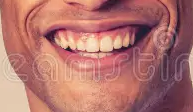

Cropped image saved to /content/cropped_image.jpg


In [75]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

# Load the image
image = cv2.imread('/content/new im.jpg')
height, width, _ = image.shape

# Convert the BGR image to RGB
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform facial landmark detection
results = face_mesh.process(rgb_image)

# Extract landmarks if faces are detected
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        # Select landmarks below the nose
        # Landmark 1: nose tip
        # Landmark 152: chin
        # Landmarks 234 and 454: left and right sides of the jaw

        nose_tip = face_landmarks.landmark[1]
        chin = face_landmarks.landmark[152]
        left_jaw = face_landmarks.landmark[234]
        right_jaw = face_landmarks.landmark[454]

        # Calculate the bounding box
        x_min = int(min(nose_tip.x, chin.x, left_jaw.x, right_jaw.x) * width)
        x_max = int(max(nose_tip.x, chin.x, left_jaw.x, right_jaw.x) * width)
        y_min = int(nose_tip.y * height)
        y_max = int(chin.y * height)

        # Crop the region below the nose
        cropped_image = image[y_min:y_max, x_min:x_max]

        # Visualize the cropped image
        cv2_imshow(cropped_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        output_path = "/content/cropped_image.jpg"
        cv2.imwrite(output_path, cropped_image)
        print(f"Cropped image saved to {output_path}")

# Clean up
face_mesh.close()


Lip area coordinates: Top-left (x, y): (341, 270), Width: 110, Height: 47


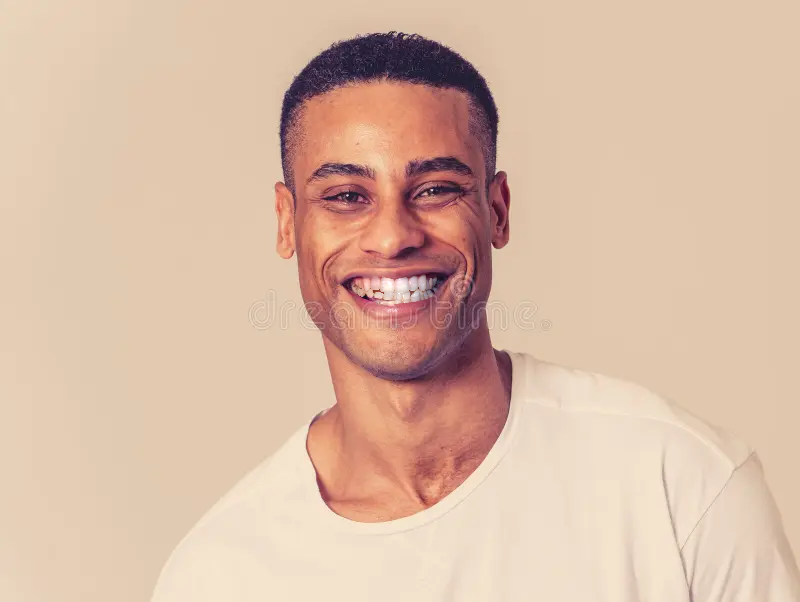

Final image saved to /content/final_image.jpg


In [79]:
import face_alignment
from matplotlib import pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Initialize face alignment model
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, flip_input=False, device='cpu')

# Load the input image
img = cv2.imread("/content/new im.jpg")
if img is None:
    print("Error: Could not load image. Check the file path.")
else:
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect landmarks
    landmarks = fa.get_landmarks(rgb_img)

    # Load the replacement image
    replacement_img = cv2.imread("/content/Teeth_by_David_Shankbone.png")
    if replacement_img is None:
        print("Error: Could not load replacement image.")
    else:
        # Loop over detected landmarks
        for landmark_set in landmarks:
            # Extract the coordinates for the lip area (approximate teeth region)
            lip_points = np.array([[int(landmark_set[i][0]), int(landmark_set[i][1])] for i in range(48, 68)], dtype=np.int32)

            # Find the bounding box for the lip area
            (x, y, w, h) = cv2.boundingRect(lip_points)
            print(f"Lip area coordinates: Top-left (x, y): ({x}, {y}), Width: {w}, Height: {h}")

            padding = 1  # Adjust this value as needed
            x = max(x - padding, 0)
            y = max(y - padding, 0)
            w = min(w + 2 * padding, img.shape[1] - x)
            h = min(h + 2 * padding, img.shape[0] - y)


            # Resize replacement image to fit the bounding box dimensions
            replacement_img_resized = cv2.resize(replacement_img, (w, h))

            # Create a mask for the replacement image
            mask = np.zeros((h, w), dtype=np.uint8)
            cv2.fillConvexPoly(mask, lip_points - [x, y], 200)

            # Create a region of interest (ROI) in the original image
            roi = img[y:y+h, x:x+w]

            # Blend the replacement image onto the original image using seamless cloning
            img[y:y+h, x:x+w] = cv2.seamlessClone(replacement_img_resized, roi, mask, (w//2, h//2), cv2.NORMAL_CLONE)

            # Optional: Draw the landmarks and bounding box for visualization
            # cv2.polylines(img, [lip_points], isClosed=True, color=(0, 255, 0), thickness=1)

        # Display the result with landmarks and bounding box
        cv2_imshow(img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        output_path = "/content/final_image.jpg"
        cv2.imwrite(output_path, img)
        print(f"Final image saved to {output_path}")


Lip area coordinates: Top-left (x, y): (53, 62), Width: 149, Height: 75


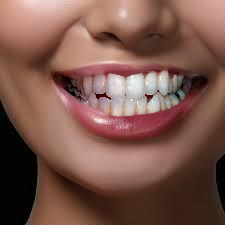

Final image saved to /content/final_image.jpg


In [95]:
import face_alignment
from matplotlib import pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Initialize face alignment model
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, flip_input=False, device='cpu')

# Load the input image
img = cv2.imread("/content/images (1).jpg")
if img is None:
    print("Error: Could not load image. Check the file path.")
else:
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect landmarks
    landmarks = fa.get_landmarks(rgb_img)

    # Load the replacement image
    replacement_img = cv2.imread("/content/Teeth_by_David_Shankbone.png")
    if replacement_img is None:
        print("Error: Could not load replacement image.")
    else:
        # Loop over detected landmarks
        for landmark_set in landmarks:
            # Extract the coordinates for the lip area (approximate teeth region)
            lip_points = np.array([[int(landmark_set[i][0]), int(landmark_set[i][1])] for i in range(48, 68)], dtype=np.int32)

            # Find the bounding box for the lip area
            (x, y, w, h) = cv2.boundingRect(lip_points)
            print(f"Lip area coordinates: Top-left (x, y): ({x}, {y}), Width: {w}, Height: {h}")

            # # Add padding to ensure full coverage of the lips
            padding = 2  # Adjust this value as needed
            x = max(x - padding, 0)
            y = max(y - padding, 0)
            w = min(w + 2 * padding, img.shape[1] - x)
            h = min(h + 2 * padding, img.shape[0] - y)

            # Resize replacement image to fit the bounding box dimensions
            replacement_img_resized = cv2.resize(replacement_img, (w, h))

            # Create a mask for the replacement image
            mask = np.zeros((h, w), dtype=np.uint8)
            adjusted_lip_points = lip_points - [x, y]
            cv2.fillConvexPoly(mask, adjusted_lip_points, 255)  # Use 255 for a full mask

            # Create a region of interest (ROI) in the original image
            roi = img[y:y+h, x:x+w]

            # Seamlessly blend the replacement image onto the original image
            result = cv2.seamlessClone(replacement_img_resized, roi, mask, (w//2, h//2), cv2.NORMAL_CLONE)
            img[y:y+h, x:x+w] = result

            # Optional: Draw the landmarks and bounding box for visualization
            # cv2.polylines(img, [lip_points], isClosed=True, color=(0, 255, 0), thickness=1)

        # Display the result with landmarks and bounding box
        cv2_imshow(img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        output_path = "/content/final_image.jpg"
        cv2.imwrite(output_path, img)
        print(f"Final image saved to {output_path}")


# New section